In [41]:
import os
import pandas as pd
from pandas import to_datetime
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')




import itertools
from tqdm import tqdm
#ARIMA 모델 패키지
from statsmodels.tsa.arima.model import  ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#AUTO ARIMA 모델 패키지
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_predict

# 인덱스 추가
# 예측

df = pd.read_csv('/Users/kylee/Downloads/SURFACE_ASOS_108_MI_2022-11_2022-11_2022.csv', encoding='CP949')
df

df['date'] = pd.to_datetime(df['일시'], format='%Y-%m-%d %H', errors='raise')
# df['new_Date'] = pd.to_datetime(df['일시'])
df.drop('일시', axis = 1, inplace=True)

#train 데이터와 validation 데이터 나누기
x_train = df[df['date'] < '2022-11-25']
x_valid = df[df['date'] >= '2022-11-25']

#예측한 열만 필터링하기
nyc = x_train[['date', '기온(°C)'] ]
nyc_v = x_valid[['date', '기온(°C)'] ]

# Date 를 dataframe의 인덱스로 만들어주기
nyc.set_index('date', inplace = True)
nyc_v.set_index('date', inplace = True)

nyc_i = nyc.index
nyc.index = pd.DatetimeIndex(nyc.index).to_period('H')
nyc_v.index = pd.DatetimeIndex(nyc_v.index).to_period('H')
# nyc.index = pd.DatetimeIndex(nyc.index).to_period('H')

#4주간의 값을 예측할 것이므로 예측날짜들을 인덱스로 한 Dataframe 만들기
index_4_days = pd.date_range("2022-11-24 23:00", freq='1H', periods=24*4, tz = None)

#확인해보기
index_4_days



DatetimeIndex(['2022-11-24 23:00:00', '2022-11-25 00:00:00',
               '2022-11-25 01:00:00', '2022-11-25 02:00:00',
               '2022-11-25 03:00:00', '2022-11-25 04:00:00',
               '2022-11-25 05:00:00', '2022-11-25 06:00:00',
               '2022-11-25 07:00:00', '2022-11-25 08:00:00',
               '2022-11-25 09:00:00', '2022-11-25 10:00:00',
               '2022-11-25 11:00:00', '2022-11-25 12:00:00',
               '2022-11-25 13:00:00', '2022-11-25 14:00:00',
               '2022-11-25 15:00:00', '2022-11-25 16:00:00',
               '2022-11-25 17:00:00', '2022-11-25 18:00:00',
               '2022-11-25 19:00:00', '2022-11-25 20:00:00',
               '2022-11-25 21:00:00', '2022-11-25 22:00:00',
               '2022-11-25 23:00:00', '2022-11-26 00:00:00',
               '2022-11-26 01:00:00', '2022-11-26 02:00:00',
               '2022-11-26 03:00:00', '2022-11-26 04:00:00',
               '2022-11-26 05:00:00', '2022-11-26 06:00:00',
               '2022-11-

In [45]:
import numpy as np
n = pd.concat([nyc, nyc_v] )

In [28]:
model = SARIMAX(nyc['기온(°C)'], order=(1,1,4), seasonal_order=(0, 1, 0, 24))
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              기온(°C)   No. Observations:                34537
Model:             SARIMAX(1, 1, 4)x(0, 1, [], 24)   Log Likelihood               48352.522
Date:                             Fri, 02 Dec 2022   AIC                         -96693.043
Time:                                     01:04:25   BIC                         -96642.349
Sample:                                 11-01-2022   HQIC                        -96676.885
                                      - 11-24-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3154      0.330      0.955      0.340      -0.332       0.963
ma.L1         -0.3913      0.330     -1.185      0.236      -1.038       0.256
ma.L2          0.0252      0.026      0.983      0.326      -0.025       0.075
ma.L3         -0.0058      0.005     -1.161      0.245      -0.016       0.004
ma.L4          0.0128      0.004      2.886      0.004       0.004       0.021
sigma2         0.0036   1.97e-05    180.543      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4965.17
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

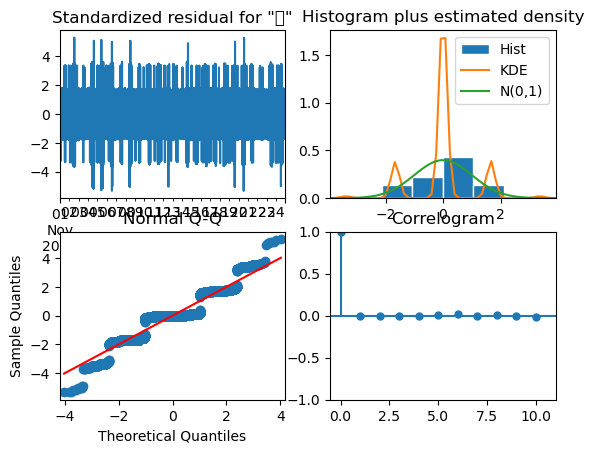

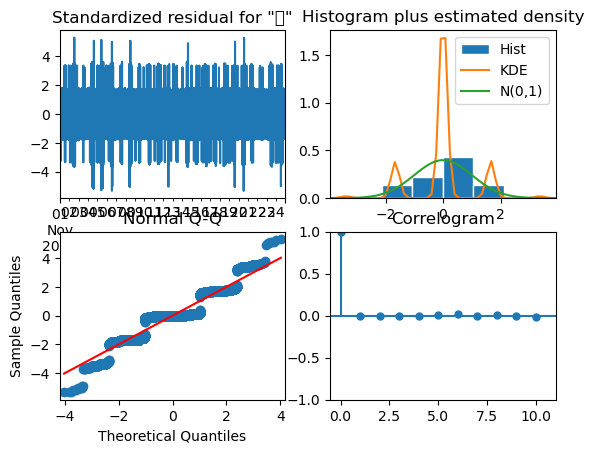

In [29]:
model_fit.plot_diagnostics()
pred = model_fit.get_prediction(start = pd.to_datetime('2022-11-25 00:00'),end = pd.to_datetime('2022-11-29 00:00'), dynamic= True )
pred

In [54]:
pred = model_fit.predict(start = pd.to_datetime('2022-11-25 00:00'),end = pd.to_datetime('2022-11-29 00:00'), dynamic= True)
pred.values

array([13.10103784, 13.20146655, 13.20160243, 13.20165162, 13.30166714,
       13.30167203, 13.30167357, 13.40167406, 13.40167421, 13.40167426,
       13.40167428, 13.40167428, 13.40167428, 13.40167428, 13.50167428,
       13.50167428, 13.60167428, 13.60167428, 13.60167428, 13.70167428,
       13.80167428, 13.80167428, 13.80167428, 13.80167428, 13.80271212,
       13.90314083, 13.90327672, 13.90332591, 14.00334142, 14.00334631,
       14.00334786, 14.10334834, 14.1033485 , 14.10334855, 14.10334856,
       14.10334857, 14.10334857, 14.10334857, 14.20334857, 14.20334857,
       14.30334857, 14.30334857, 14.30334857, 14.40334857, 14.50334857,
       14.50334857, 14.50334857, 14.50334857, 14.50438641, 14.60481512,
       14.604951  , 14.60500019, 14.70501571, 14.7050206 , 14.70502214,
       14.80502263, 14.80502278, 14.80502283, 14.80502284, 14.80502285,
       14.80502285, 14.80502285, 14.90502285, 14.90502285, 15.00502285,
       15.00502285, 15.00502285, 15.10502285, 15.20502285, 15.20

In [55]:
pred = pd.DataFrame(data=pred.values, index=pred.index, columns=['pred'])
pred

,pred
2022-11-25 00:00,13.101038
2022-11-25 01:00,13.201467
2022-11-25 02:00,13.201602
2022-11-25 03:00,13.201652
2022-11-25 04:00,13.301667
...,...
2022-11-28 20:00,15.906697
2022-11-28 21:00,15.906697
2022-11-28 22:00,15.906697
2022-11-28 23:00,15.906697


<AxesSubplot:xlabel='date'>

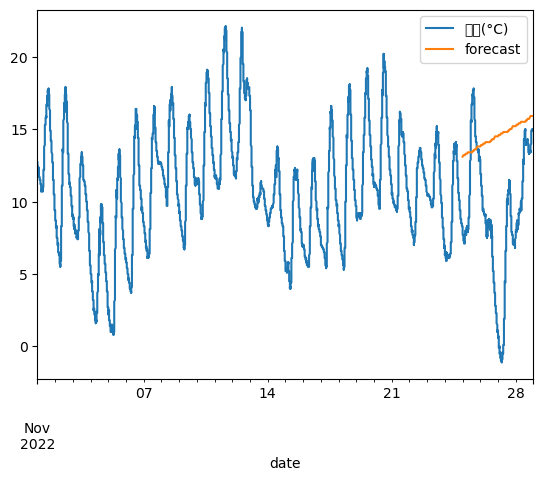

In [57]:
n['forecast'] = pred
n[['기온(°C)', 'forecast']].plot()



<AxesSubplot:>

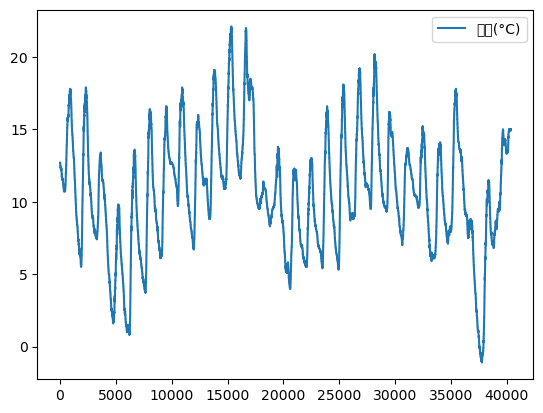

In [20]:
# df['forecast'] = pred 
# df[['기온(°C)', 'forecast']].plot()